In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'seaborn'

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
Son {}
Precisión Árboles de Decisión Clasificación: 1.0
Matriz de confusion
[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


NameError: name 'sns' is not defined

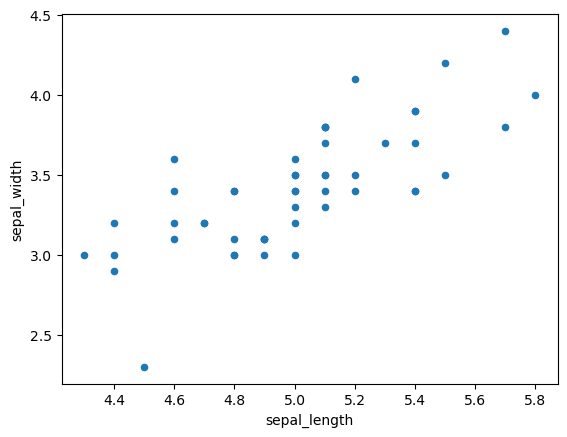

<Figure size 550x400 with 0 Axes>

In [7]:
#Importamos el dataset para iniciar el análisis
iris = pd.read_csv("Iris.csv")

# Análisis de datos
print(iris.head())

fig = iris[iris.species == 'setosa'].plot(kind='scatter', x='sepal_length', y='sepal_width')


#Separo todos los datos con las características y las etiquetas o resultados
X = np.array(iris.drop(['species'],axis=1))
y = np.array(iris['species'])

#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print('Son {}')

from sklearn.ensemble import RandomForestClassifier
#Modelo de Árboles de Decisión Clasificación
algoritmo = RandomForestClassifier(n_estimators=100)
algoritmo.fit(X_train, y_train)
y_pred = algoritmo.predict(X_test)
print('Precisión Árboles de Decisión Clasificación: {}'.format(algoritmo.score(X_train, y_train)))


# Elaborar una matriz de confusión
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de confusion')
print(matriz)

cm_df = pd.DataFrame(matriz,
                     index = ['setosa', 'versicolor', 'virginica'],
                     columns = ['setosa', 'versicolor', 'virginica'])

plt.figure(figsize=(5.5, 4))
sns.heatmap(cm_df, anno=True)
plt.title('SVM Linear Kernel')
plt.ylabel('True Label')
plt.xlabel('Predicted label')
plt.show()

#Matriz de confusion
cm = confusion_matrix(y_test, y_pred, labels=algoritmo.classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,displaylabels=algoritmo.classes)
disp.plot()
plt.show()
